https://xgboost.readthedocs.io/en/stable/parameter.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from xgboost import XGBClassifier, XGBRegressor,XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Parameters :

- __gamma (min_split_loss)__

minimum loss reduction to create a new split

highly dependent on the data


The larger gamma is, the more conservative the algorithm will be.

range: [0,∞]


- __booster__

booster is the boosting algorithm, for which you have 3 options: 
    
    - gbtree, 
    
    - gblinear 
    
    - or dart . 
    
The default option is gbtree , which is the version I explained in this article. dart is a similar version that uses dropout techniques to avoid overfitting, and gblinear uses generalized linear regression instead of decision trees.

- __learning_rate__ 

also called eta $\eta\;$, it specifies how quickly the model fits the residual errors by using additional base learners.

typical values: 0.05–0.5


- __reg_alpha and reg_lambda__

reg_alpha and reg_lambda are L1 and L2 regularisation terms, respectively. The greater these numbers, the more conservative (less prone to overfitting but might miss relevant information) the model becomes. Recommended values lie between 0–1000 for both.


default reg_alpha is 1 and re_lambda is 0


typical values for reg_alpha and reg_lambda: 0 - 1 is a good starting point but again, depends on the data


- __max_depth__

max_depth sets the maximum depth of the decision trees. The greater this number, the less conservative the model becomes. If set to 0, then there is no limit for trees’ depth.


- __subsample__

subsample is the size of the sample ratio to be used when training the predictors. Default is 1, meaning there is no sampling and we use the whole data. If set to 0.7, for instance, then 70% of the observations would be randomly sampled to be used in each boosting iteration (a new sample is taken for each iteration). It can help to prevent overfitting.

typical values: 0.5–0.9


- __num_estimators__

num_estimators sets the number of boosting rounds, which equals setting the number of boosted trees to use. The greater this number, the greater the risk of overfitting (but low numbers can also lead to low performance).




Parameters : Regression
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: Optional[str]
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: Optional[str]
        Specify which tree method to use.  Default to auto.  If this parameter
        is set to default, XGBoost will choose the most conservative option
        available.  It's recommended to study this option from the parameters
        document: https://xgboost.readthedocs.io/en/latest/treemethod.html.
    n_jobs : Optional[int]
        Number of parallel threads used to run xgboost.  When used with other Scikit-Learn
        algorithms like grid search, you may choose which algorithm to parallelize and
        balance the threads.  Creating thread contention will significantly slow down both
        algorithms.
    gamma : Optional[float]
        Minimum loss reduction required to make a further partition on a leaf
        node of the tree.
    min_child_weight : Optional[float]
        Minimum sum of instance weight(hessian) needed in a child.
    max_delta_step : Optional[float]
        Maximum delta step we allow each tree's weight estimation to be.
    subsample : Optional[float]
        Subsample ratio of the training instance.
    colsample_bytree : Optional[float]
        Subsample ratio of columns when constructing each tree.
    colsample_bylevel : Optional[float]
        Subsample ratio of columns for each level.
    colsample_bynode : Optional[float]
        Subsample ratio of columns for each split.
    reg_alpha : Optional[float]
        L1 regularization term on weights (xgb's alpha).
    reg_lambda : Optional[float]
        L2 regularization term on weights (xgb's lambda).
    scale_pos_weight : Optional[float]
        Balancing of positive and negative weights.
    base_score : Optional[float]
        The initial prediction score of all instances, global bias.
    random_state : Optional[Union[numpy.random.RandomState, int]]
        Random number seed.

        .. note::

           Using gblinear booster with shotgun updater is nondeterministic as
           it uses Hogwild algorithm.

    missing : float, default np.nan
        Value in the data which needs to be present as a missing value.
    num_parallel_tree: Optional[int]
        Used for boosting random forest.
    monotone_constraints : Optional[Union[Dict[str, int], str]]
        Constraint of variable monotonicity.  See tutorial for more
        information.
    interaction_constraints : Optional[Union[str, List[Tuple[str]]]]
        Constraints for interaction representing permitted interactions.  The
        constraints must be specified in the form of a nest list, e.g. [[0, 1],
        [2, 3, 4]], where each inner list is a group of indices of features
        that are allowed to interact with each other.  See tutorial for more
        information
    importance_type: Optional[str]
        The feature importance type for the feature_importances\_ property:

        * For tree model, it's either "gain", "weight", "cover", "total_gain" or
          "total_cover".
        * For linear model, only "weight" is defined and it's the normalized coefficients
          without bias.

    gpu_id : Optional[int]
        Device ordinal.
    validate_parameters : Optional[bool]
        Give warnings for unknown parameter.
    predictor : Optional[str]
        Force XGBoost to use specific predictor, available choices are [cpu_predictor,
        gpu_predictor].
    enable_categorical : bool

        .. versionadded:: 1.5.0

        Experimental support for categorical data.  Do not set to true unless you are
        interested in development. Only valid when `gpu_hist` and dataframe are used.

    kwargs : dict, optional
        Keyword arguments for XGBoost Booster object.  Full documentation of
        parameters can be found here:
        https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst.
        Attempting to set a parameter via the constructor args and \*\*kwargs
        dict simultaneously will result in a TypeError.

        .. note:: \*\*kwargs unsupported by scikit-learn

            \*\*kwargs is unsupported by scikit-learn.  We do not guarantee
            that parameters passed via this argument will interact properly
            with scikit-learn.

        .. note::  Custom objective function

            A custom objective function can be provided for the ``objective``
            parameter. In this case, it should have the signature
            ``objective(y_true, y_pred) -> grad, hess``:

            y_true: array_like of shape [n_samples]
                The target values
            y_pred: array_like of shape [n_samples]
                The predicted values

            grad: array_like of shape [n_samples]
                The value of the gradient for each sample point.
            hess: array_like of shape [n_samples]
                The value of the second derivative for each sample point

## OPTUNA

https://www.kaggle.com/code/hamzaghanmi/xgboost-catboost-using-optuna

https://towardsdatascience.com/the-kaggle-way-to-tune-hyperparameters-with-optuna-285e59a0b95a

https://practicaldatascience.co.uk/machine-learning/how-to-use-optuna-for-xgboost-hyperparameter-tuning

https://www.kaggle.com/code/garylucn/top-9-house-price/notebook

https://www.kaggle.com/code/para24/xgboost-stepwise-tuning-using-optuna

Over the past year or so, the Optuna package has quickly become a favourite among data scientists for hyperparameter tuning on machine learning models, and for good reason. It’s lightweight, easy-to-use, very efficient for optimising hyperparameters, and it’s much faster than other tools like GridSearchCV.


Unlike GridSearchCV, Optuna doesn’t require you to specify a grid of hyperparameter values to search over. Instead, you specify the range of values for each hyperparameter, and Optuna will search over that range to find the optimal values. This makes it much more efficient than GridSearchCV, which can take a long time to run if you have a large number of hyperparameters to tune.

1. Basic Concepts 
So, We use the terms study and trial as follows:

- Study : optimization based on an objective function

- Trial : a single execution of the objective function

#### Making the Optuna objective function


This objective is a bit different from what you may recall from Machine learning theory.

An objective function in Optuna contains the following actions:

It accepts a __dictionary__ of different hyperparameters we want to optimize

A model is __trained__ within the function

__Predictions__ on test/validation data are made from the trained model

The accuracy or __error__ is finally __returned__ from the function.

In [ ]:
def objective(n_trials):
  params = {
        "n_estimators": n_trials.suggest_int("n_estimators", 100, 2000, step=100),
        "learning_rate": n_trials.suggest_float("learning_rate", 1e-4, 0.3, log=True),
        "max_depth": n_trials.suggest_int("max_depth", 3, 15),
        "n_iter_no_change": 50,
    }
  dtrain = xgb.DMatrix(data = X_train, label = y_train)
  dval = xgb.DMatrix(data = X_test, label = y_val)

  regressor = xgb.train(params, dtrain) 
  y_pred = regressor.predict(dval)
  rmse = mean_squared_error(y_val, y_pred, squared=False)

  return rmse

n_trials represent each trial that is performed by the objective function, with the parameters given by suggest_int, suggest_float, and so on.

We have the convenience of specifying the start, the end, and the step count, along with a log parameter which indicates 
whether our values represent logarithm bins or not. Learning rate hyperparameter uses log, as you can see.

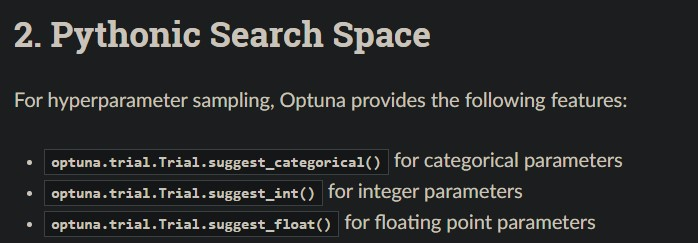

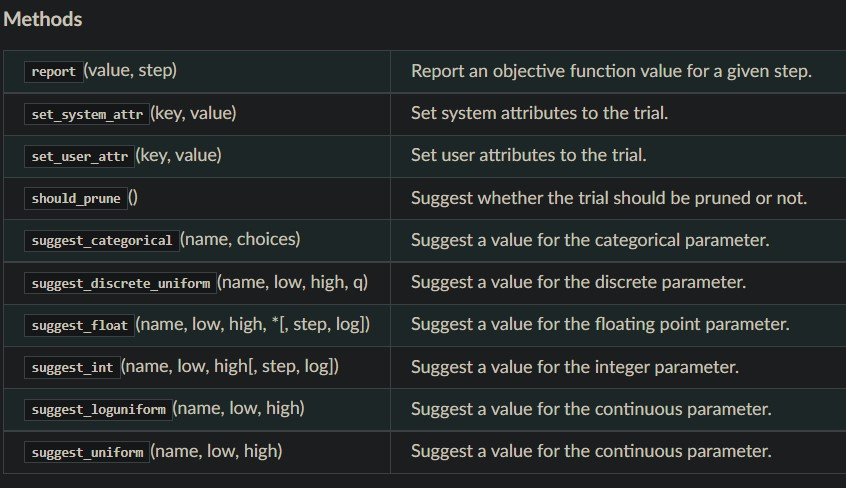

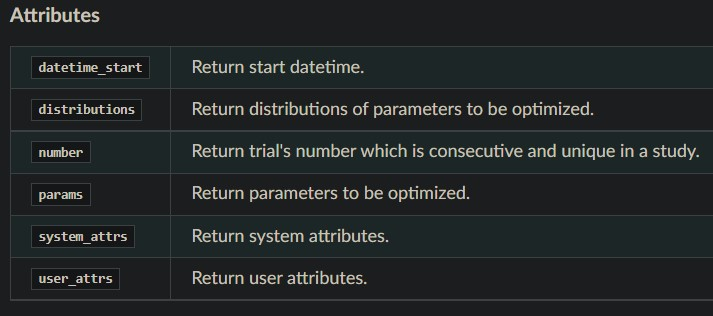

### XGBoost Classification using OPTUNA

https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407

https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_integration.py